# Case study on Supervised Learning
## Instructions
### Dataset Description:
You are provided with a dataset (heart_disease.csv) containing the following columns:

- age: Age of the individual
- sex: Gender of the individual (0 = female, 1 = male)
- chest pain type: Type of chest pain (4 categories: 0-3)
- resting blood pressure: Resting blood pressure (in mm Hg)
- serum cholesterol: Cholesterol level (in mg/dl)
- fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
- maximum heart rate achieved
- exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment (0-2)
- number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
- thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
- target: Presence of heart disease (1 = Yes, 0 = No)

## Tasks:

### Step 1: Load and Explore the Data

#### Load the dataset into a Pandas DataFrame.

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [253]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### Perform exploratory data analysis (EDA):
- Check for missing values, data types, and summary statistics.

In [254]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [255]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [256]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- Identify potential outliers in numerical columns.

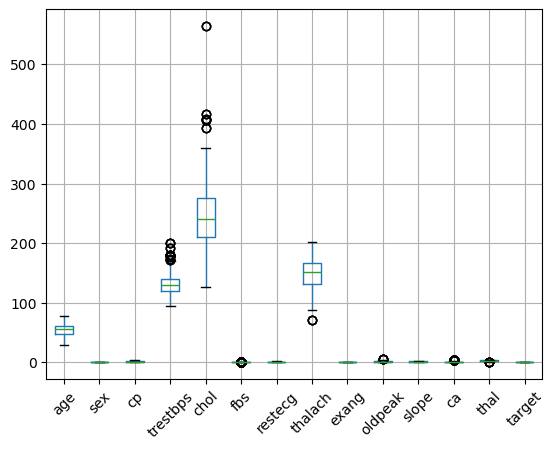

In [258]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

- Analyze the distribution of categorical variables.

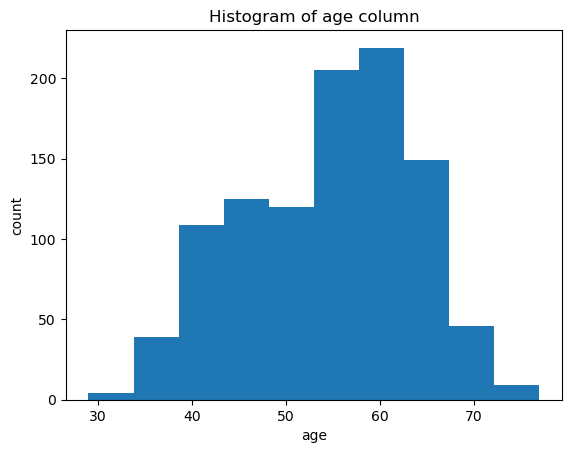

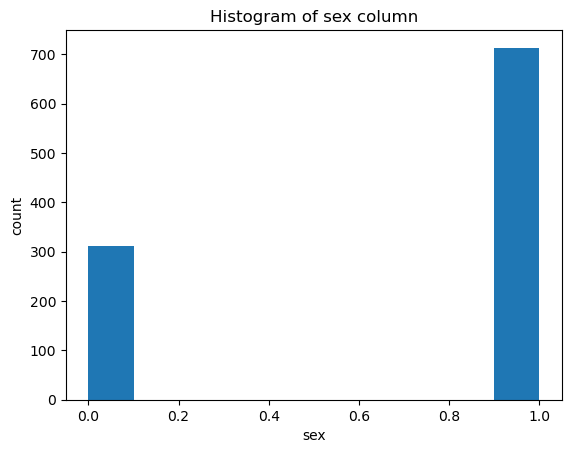

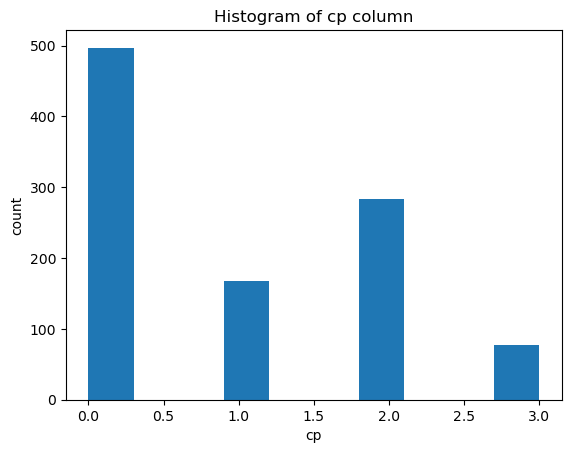

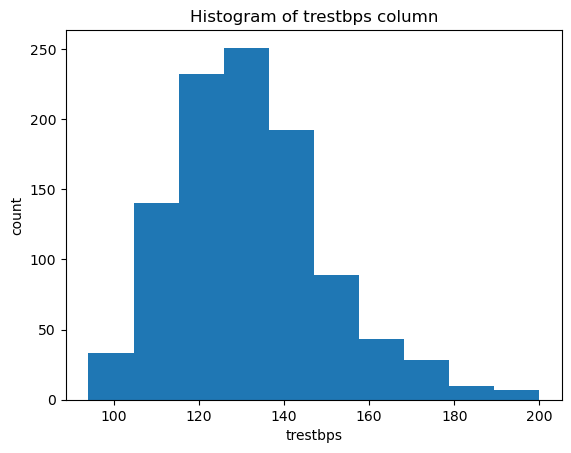

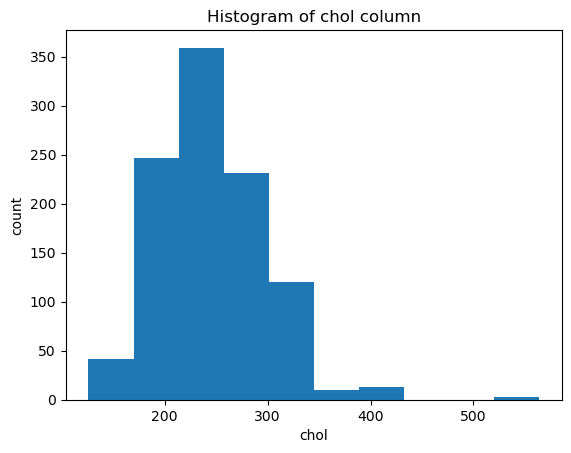

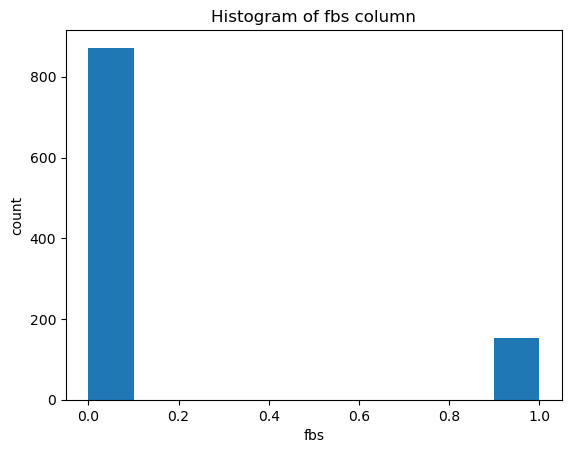

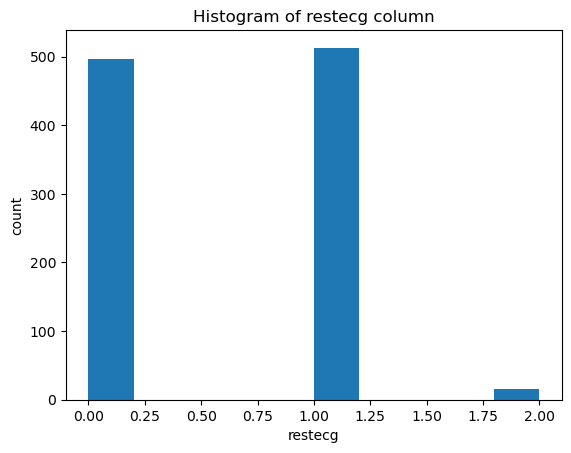

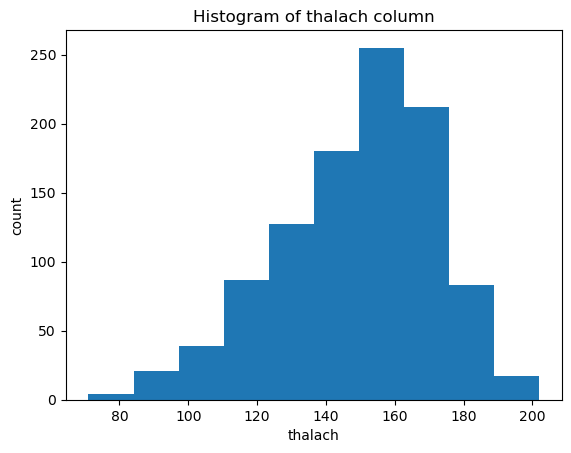

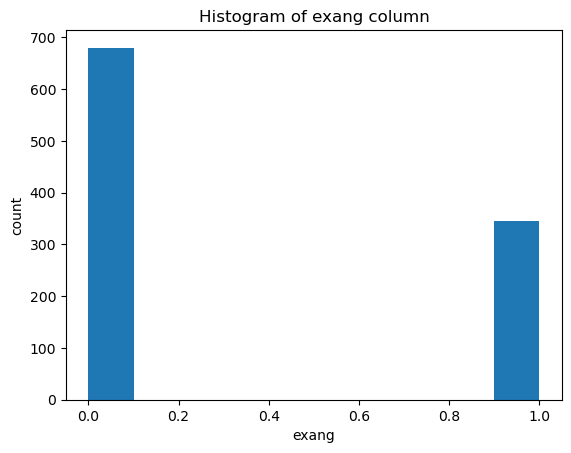

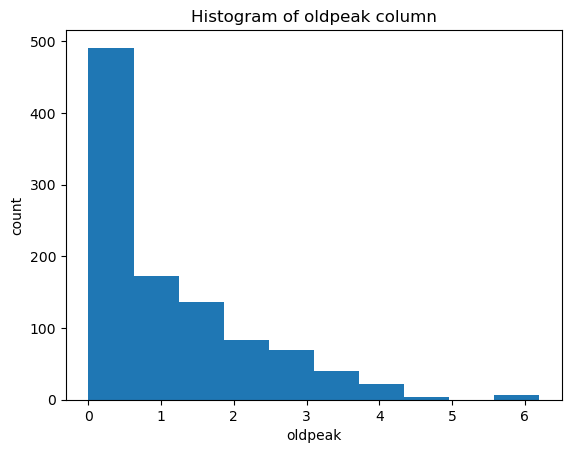

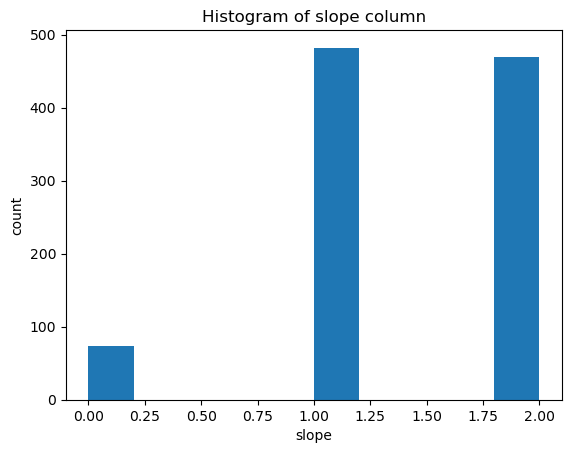

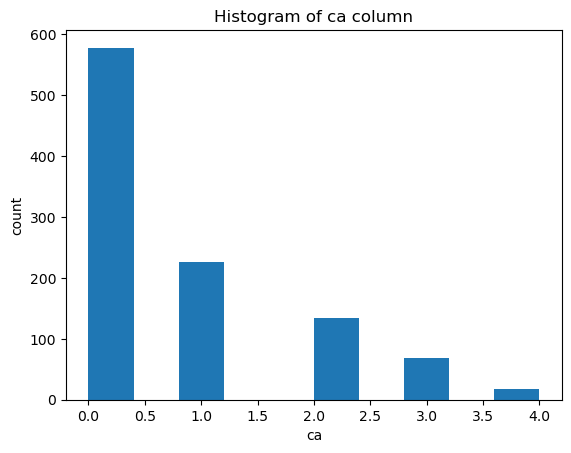

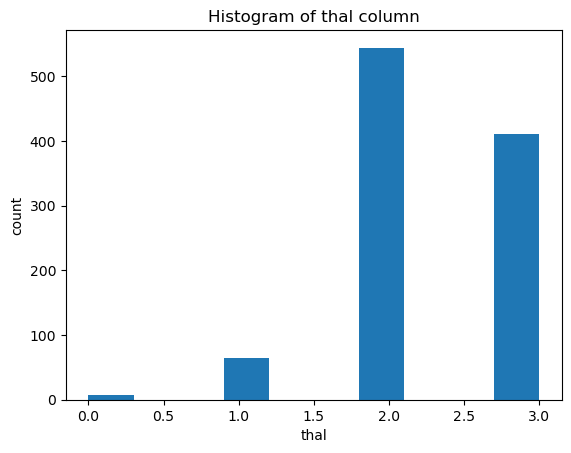

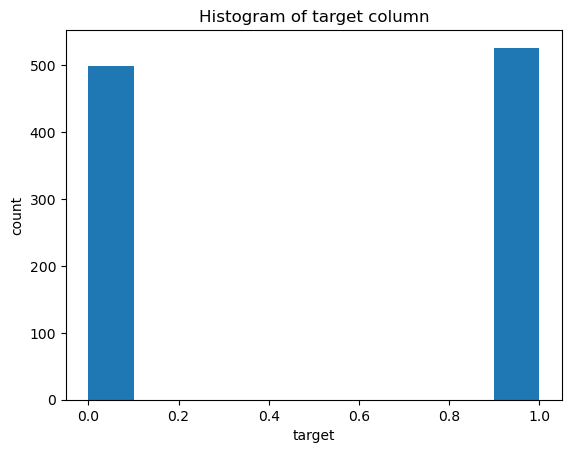

In [259]:
# There are no categorical columns in the dataset
for col in df.columns:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

### Step 2: Data Cleaning and Preprocessing
#### Handle Missing Values (if needed):

- Replace missing numerical values with the mean/median.
- Replace missing categorical values with the mode.

In [260]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Handle Outliers (if needed):

- Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.

In [261]:
def remove_outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    data[col] = data[col].clip(upper=ub)
    data[col] = data[col].clip(lower=lb)
    return data[col]

In [262]:
for col in df.columns:
    remove_outliers(df, col)

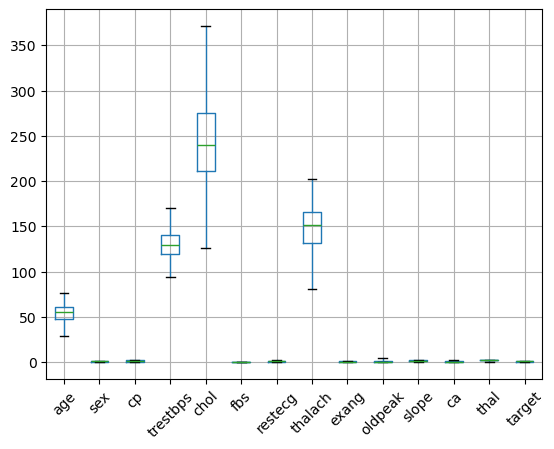

In [263]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

#### Encode Categorical Variables:

- Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).
- Use binary encoding for sex and fasting blood sugar.

In [264]:
df = pd.get_dummies(df,columns=['cp','restecg','thal'],prefix=['cp','restecg','thal'],dtype='int', drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,125,212,0,168,0,1.0,2,2.0,0,0,0,0,1,0,0,0,1
1,53,1,140,203,0,155,1,3.1,0,0.0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0.0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1.0,0,0,0,0,1,0,0,0,1
4,62,0,138,294,0,106,0,1.9,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0.0,1,1,0,0,1,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,1.0,0,0,0,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1.0,1,1.0,0,0,0,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,2,0.0,1,0,0,0,0,0,0,1,0


#### Scale Numerical Features:

- Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

In [265]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.260488,244.981463,0.0,149.153171,0.336585,1.062244,1.385366,0.694146,0.513171,0.162927,0.277073,0.075122,0.500488,0.014634,0.062439,0.530732,0.400000
std,9.072290,0.460373,16.532208,47.746162,0.0,22.881210,0.472772,1.141865,0.617755,0.890414,0.500070,0.369479,0.447771,0.263717,0.500244,0.120142,0.242069,0.499298,0.490137
min,29.000000,0.000000,94.000000,126.000000,0.0,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.0,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.000000,0.0,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.0,166.000000,1.000000,1.800000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,170.000000,371.000000,0.0,202.000000,1.000000,4.500000,2.000000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
norm_scaler = MinMaxScaler()
df[['trestbps','chol','thalach','oldpeak']] = norm_scaler.fit_transform(df[['trestbps','chol','thalach','oldpeak']])
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.490270,0.485639,0.0,0.563249,0.336585,0.236054,1.385366,0.694146,0.513171,0.162927,0.277073,0.075122,0.500488,0.014634,0.062439,0.530732,0.400000
std,9.072290,0.460373,0.217529,0.194882,0.0,0.189101,0.472772,0.253748,0.617755,0.890414,0.500070,0.369479,0.447771,0.263717,0.500244,0.120142,0.242069,0.499298,0.490137
min,29.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.342105,0.346939,0.0,0.421488,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,0.473684,0.465306,0.0,0.586777,0.000000,0.177778,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,0.605263,0.608163,0.0,0.702479,1.000000,0.400000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3: Train-Test Split
Split the data into training and testing sets:

#### For Regression: Predict serum cholesterol as the target variable.

In [267]:
y_regr = df['chol']
X_regr = df.drop('chol', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size=0.2, random_state=2)

#### For Classification: Predict target (presence of heart disease) as the target variable.

In [268]:
y_class = df['target']
X_class = df.drop('target', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=2)

### Step 4: Build Machine Learning Models
#### Regression Task:

- Train a Linear Regression model to predict serum cholesterol.

In [269]:
lr_model = LinearRegression() # create an object of the model
lr_model.fit(X_regr_train,y_regr_train)
predicted_lr_values = lr_model.predict(X_regr_test)

In [270]:
# in a line equation W1X1+X0
print("Intercept: ", lr_model.intercept_) # Intercept X0
print("Coefficient: ", lr_model.coef_) # Weight W1

Intercept:  0.14084904628642947
Coefficient:  [ 3.39408435e-03 -7.69988370e-02  6.11548294e-02  6.59194921e-17
  7.60516282e-02  3.02638000e-02  6.86358813e-03  2.36401144e-02
 -2.41679579e-03 -4.74026325e-02  1.13511946e-02 -1.45642744e-02
 -3.83593794e-02 -3.93331018e-02  4.95381426e-02  8.57965760e-02
  1.51078777e-01  1.49882977e-01]


#### Classification Task:

- Train the following models to predict target:
  - Logistic Regression
  - K-Nearest Neighbors (KNN)
  - Naive Bayes

In [271]:
logr_model = LogisticRegression()
logr_model.fit(X_class_train,y_class_train)
predicted_logr_values = logr_model.predict(X_class_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [272]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_class_train, y_class_train)
predicted_knn_values = knn.predict(X_class_test)

In [273]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_class_train, y_class_train)

predicted_nb_values = naive_bayes.predict(X_class_test)

### Step 5: Evaluate Models on Test Data

#### For Regression:

- Evaluate the Linear Regression model using:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - R-squared (R²)



In [274]:
mae = mean_absolute_error(y_regr_test, predicted_lr_values)
mse = mean_squared_error(y_regr_test, predicted_lr_values)
r_squared = r2_score(y_regr_test, predicted_lr_values)

metrics = {
    'Metric': ['MAE', 'MSE', 'R2 Score'],
    'Value': [mae, mse, r_squared]
}

metrics_df = pd.DataFrame(metrics)

print("\nLinear Regression Evaluation")
metrics_df


Linear Regression Evaluation


,Metric,Value
0,MAE,0.136244
1,MSE,0.030454
2,R2 Score,0.162119


#### For Classification:

- Evaluate each classification model using:
  - Accuracy
  - Precision
  - Recall
  - F1-Score

In [275]:
test_accuracy = accuracy_score(y_class_test, predicted_logr_values)
test_precision = precision_score(y_class_test, predicted_logr_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_logr_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_logr_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nLogistic Regression Evaluation")
metrics_df


Logistic Regression Evaluation


,Metric,Value
0,Accuracy,0.863415
1,Precision,0.867219
2,Recall,0.863415
3,F1 Score,0.863252


In [276]:
test_accuracy = accuracy_score(y_class_test, predicted_knn_values)
test_precision = precision_score(y_class_test, predicted_knn_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_knn_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_knn_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nK-Nearest Neighbours Evaluation")
metrics_df


K-Nearest Neighbours Evaluation


,Metric,Value
0,Accuracy,0.853659
1,Precision,0.853659
2,Recall,0.853659
3,F1 Score,0.853659


In [277]:
test_accuracy = accuracy_score(y_class_test, predicted_nb_values)
test_precision = precision_score(y_class_test, predicted_nb_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_nb_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_nb_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nNaive Bayes Evaluation")
metrics_df


Naive Bayes Evaluation


,Metric,Value
0,Accuracy,0.834146
1,Precision,0.837741
2,Recall,0.834146
3,F1 Score,0.833949
